In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'eog-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3224911%2F5606701%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240513%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240513T181239Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3fb19d359b4fff1d09fa3f84bf274f6eca9e4ba928d83f9bd040d6daf26381f1848f322559ad6146694bf3e3541e90fcc8def93eb3f3c0eeb451e016be832fabf0ec425f28c13e0184efb702f185fdffc6b373a455d267a6f60f363a076dded4273f319c2d2d4070b2ee7e32fe035dd71a3faa04ece2f6edc739e09e30c6ad72ed5a5002815c2e5a7e6a119a605b5912edd5c85b6a919a3f01cd4067f3ea19809f4617ae66facf5ffeb6042d610ef7b823138e1c5027d8cfb803de72ba06c5c5dc62401d8871a12c7e555ba86bd0709b2d1aa669e3bda3483f1bdcd3a803b14fc130ba5fecb102bf8fca2995e905c0417ccb9ccfdc6cbe85fba61c2b96beffbf'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 126244 bytes downloaded
Downloaded and uncompressed: eog-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eog-dataset/Dataset Classes.txt
/kaggle/input/eog-dataset/class/3-class/yukari2v.txt
/kaggle/input/eog-dataset/class/3-class/yukari6v.txt
/kaggle/input/eog-dataset/class/3-class/örnek20h.txt
/kaggle/input/eog-dataset/class/3-class/yukarı4h.txt
/kaggle/input/eog-dataset/class/3-class/kirp6h.txt
/kaggle/input/eog-dataset/class/3-class/örnek5h.txt
/kaggle/input/eog-dataset/class/3-class/yukari3h.txt
/kaggle/input/eog-dataset/class/3-class/kirp6v.txt
/kaggle/input/eog-dataset/class/3-class/asagi7v.txt
/kaggle/input/eog-dataset/class/3-class/sol7h.txt
/kaggle/input/eog-dataset/class/3-class/örnek14h.txt
/kaggle/input/eog-dataset/class/3-class/sag1v.txt
/kaggle/input/eog-dataset/class/3-class/sag18h.txt
/kaggle/input/eog-dataset/class/3-class/yukarı2h.txt
/kaggle/input/eog-dataset/class/3-class/kirp8h.txt
/kaggle/input/eog-dataset/class/3-class/sol11v.txt
/kaggle/input/eog-dataset/class/3-class/örnek17h.txt
/kaggle/input/eog-dataset/class/3-class/örnek34h.txt
/kaggle/input/eog-

In [ ]:
import os
import pandas as pd

input_data = "/kaggle/input/eog-dataset/class/3-class"

data = []

column_names = []

for root, dirs, files in os.walk(input_data):
    for file in files:
        if file.endswith(".txt"):
            # Read file
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                lines = f.readlines()

            lines = [int(line.strip()) for line in lines]

            data.append(lines)

            column_names.append(file)

result_df = pd.DataFrame(data)

result_df["file_name"] = column_names

print(result_df)


       0    1    2    3    4    5    6    7    8    9  ...    242    243  \
0    115  113  116  122  114  114  118  115  119  121  ...  136.0  125.0   
1    130  129  135  123  131  130  129  124  130  127  ...  128.0  123.0   
2    158  161  159  156  160  161  162  166  171  165  ...  138.0  139.0   
3    115  126  115  126  118  129  123  124  122  122  ...  148.0  147.0   
4    128  138  138  130  132  139  133  134  139  135  ...  132.0  131.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
273  134  131  127  132  133  127  133  133  129  127  ...  133.0  125.0   
274  158  159  156  159  159  157  161  160  156  161  ...  131.0  129.0   
275  129  126  126  129  129  132  126  125  126  129  ...  123.0  123.0   
276  131  129  131  128  130  133  127  131  133  130  ...  143.0  139.0   
277  125  123  127  128  128  124  123  119  122  120  ...  129.0  128.0   

       244    245    246    247    248    249    250     file_name  
0    134.0  133.0 

In [ ]:
import pandas as pd

output_csv_path = "/kaggle/working/data.csv"
result_df.to_csv(output_csv_path, index=False)

data= pd.read_csv("/kaggle/working/data.csv")
data

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,file_name
0,115,113,116,122,114,114,118,115,119,121,...,136.0,125.0,134.0,133.0,137.0,134.0,136.0,134.0,131.0,yukari2v.txt
1,130,129,135,123,131,130,129,124,130,127,...,128.0,123.0,124.0,125.0,129.0,127.0,124.0,128.0,127.0,yukari6v.txt
2,158,161,159,156,160,161,162,166,171,165,...,138.0,139.0,144.0,137.0,139.0,142.0,141.0,138.0,140.0,örnek20h.txt
3,115,126,115,126,118,129,123,124,122,122,...,148.0,147.0,149.0,149.0,144.0,150.0,147.0,142.0,121.0,yukarı4h.txt
4,128,138,138,130,132,139,133,134,139,135,...,132.0,131.0,124.0,130.0,135.0,125.0,128.0,134.0,131.0,kirp6h.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,134,131,127,132,133,127,133,133,129,127,...,133.0,125.0,131.0,134.0,126.0,130.0,134.0,131.0,135.0,kirp5h.txt
274,158,159,156,159,159,157,161,160,156,161,...,131.0,129.0,131.0,130.0,130.0,129.0,133.0,132.0,150.0,örnek39h.txt
275,129,126,126,129,129,132,126,125,126,129,...,123.0,123.0,123.0,123.0,123.0,123.0,121.0,123.0,0.0,örnek1.txt
276,131,129,131,128,130,133,127,131,133,130,...,143.0,139.0,139.0,142.0,142.0,137.0,142.0,144.0,100.0,sol8h.txt


In [ ]:

class_mapping = {
    "yukari": "Up",
    # "yukarı":"Up",
    "asagi": "Down",
    "sag": "Right",
    "sol": "Left",
    "kirp": "Blink",
    }

data = pd.read_csv("/kaggle/working/data.csv")

def map_file_to_class(file_name):
    for key, value in class_mapping.items():
        if key in file_name:
            return value
    return ''

def map_file_to_channels(file_name):
    if 'h' in file_name:
        return 'h'
    elif 'v' in file_name:
        return 'v'
    else:
        return ''



data["class"] = data["file_name"].apply(map_file_to_class)

data["channels"] = data["file_name"].apply(map_file_to_channels)

data.to_csv("/kaggle/working/data.csv", index=False)


# örnek

In [ ]:
data = pd.read_csv("/kaggle/working/data.csv")
data

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,file_name,class,channels
0,115,113,116,122,114,114,118,115,119,121,...,134.0,133.0,137.0,134.0,136.0,134.0,131.0,yukari2v.txt,Up,v
1,130,129,135,123,131,130,129,124,130,127,...,124.0,125.0,129.0,127.0,124.0,128.0,127.0,yukari6v.txt,Up,v
2,158,161,159,156,160,161,162,166,171,165,...,144.0,137.0,139.0,142.0,141.0,138.0,140.0,örnek20h.txt,NaN,h
3,115,126,115,126,118,129,123,124,122,122,...,149.0,149.0,144.0,150.0,147.0,142.0,121.0,yukarı4h.txt,NaN,h
4,128,138,138,130,132,139,133,134,139,135,...,124.0,130.0,135.0,125.0,128.0,134.0,131.0,kirp6h.txt,Blink,h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,134,131,127,132,133,127,133,133,129,127,...,131.0,134.0,126.0,130.0,134.0,131.0,135.0,kirp5h.txt,Blink,h
274,158,159,156,159,159,157,161,160,156,161,...,131.0,130.0,130.0,129.0,133.0,132.0,150.0,örnek39h.txt,NaN,h
275,129,126,126,129,129,132,126,125,126,129,...,123.0,123.0,123.0,123.0,121.0,123.0,0.0,örnek1.txt,NaN,NaN
276,131,129,131,128,130,133,127,131,133,130,...,139.0,142.0,142.0,137.0,142.0,144.0,100.0,sol8h.txt,Left,h


In [ ]:
data.isna().sum()

0             0
1             0
2             0
3             0
4             0
             ..
249           1
250           1
file_name     0
class        76
channels     11
Length: 254, dtype: int64

In [ ]:
data=data.dropna()
data

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,file_name,class,channels
0,115,113,116,122,114,114,118,115,119,121,...,134.0,133.0,137.0,134.0,136.0,134.0,131.0,yukari2v.txt,Up,v
1,130,129,135,123,131,130,129,124,130,127,...,124.0,125.0,129.0,127.0,124.0,128.0,127.0,yukari6v.txt,Up,v
4,128,138,138,130,132,139,133,134,139,135,...,124.0,130.0,135.0,125.0,128.0,134.0,131.0,kirp6h.txt,Blink,h
6,161,163,164,158,161,162,160,161,166,162,...,119.0,118.0,117.0,115.0,121.0,116.0,141.0,yukari3h.txt,Up,h
7,139,133,134,132,137,135,130,132,138,132,...,126.0,134.0,130.0,132.0,128.0,134.0,135.0,kirp6v.txt,Blink,v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,125,121,122,126,124,119,125,125,122,126,...,125.0,120.0,118.0,118.0,118.0,116.0,140.0,sol7v.txt,Left,v
272,140,138,141,136,142,143,141,128,137,136,...,132.0,131.0,128.0,125.0,130.0,130.0,141.0,asagi3v.txt,Down,v
273,134,131,127,132,133,127,133,133,129,127,...,131.0,134.0,126.0,130.0,134.0,131.0,135.0,kirp5h.txt,Blink,h
276,131,129,131,128,130,133,127,131,133,130,...,139.0,142.0,142.0,137.0,142.0,144.0,100.0,sol8h.txt,Left,h


In [ ]:
data.isna().sum()

0            0
1            0
2            0
3            0
4            0
            ..
249          0
250          0
file_name    0
class        0
channels     0
Length: 254, dtype: int64

In [ ]:
len(data)

202

In [ ]:
data.duplicated().sum()

0

In [ ]:
data = data.drop(columns = "file_name",axis = 1)
data

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,class,channels
0,115,113,116,122,114,114,118,115,119,121,...,125.0,134.0,133.0,137.0,134.0,136.0,134.0,131.0,Up,v
1,130,129,135,123,131,130,129,124,130,127,...,123.0,124.0,125.0,129.0,127.0,124.0,128.0,127.0,Up,v
4,128,138,138,130,132,139,133,134,139,135,...,131.0,124.0,130.0,135.0,125.0,128.0,134.0,131.0,Blink,h
6,161,163,164,158,161,162,160,161,166,162,...,114.0,119.0,118.0,117.0,115.0,121.0,116.0,141.0,Up,h
7,139,133,134,132,137,135,130,132,138,132,...,133.0,126.0,134.0,130.0,132.0,128.0,134.0,135.0,Blink,v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,125,121,122,126,124,119,125,125,122,126,...,117.0,125.0,120.0,118.0,118.0,118.0,116.0,140.0,Left,v
272,140,138,141,136,142,143,141,128,137,136,...,125.0,132.0,131.0,128.0,125.0,130.0,130.0,141.0,Down,v
273,134,131,127,132,133,127,133,133,129,127,...,125.0,131.0,134.0,126.0,130.0,134.0,131.0,135.0,Blink,h
276,131,129,131,128,130,133,127,131,133,130,...,139.0,139.0,142.0,142.0,137.0,142.0,144.0,100.0,Left,h


In [ ]:
data['channels'].value_counts()

channels
h    123
v    100
Name: count, dtype: int64

In [ ]:
blink_v = data[(data['class'] == 'Blink') & (data['channels'] == 'v')]
blink_h = data[(data['class'] == 'Blink') & (data['channels'] == 'h')]

In [ ]:
up_v = data[(data['class'] == 'Up') & (data['channels'] == 'v')]
up_h = data[(data['class'] == 'Up') & (data['channels'] == 'h')]

In [ ]:
len(up_v)

20

In [ ]:
len(up_h)

42

In [ ]:
down_v = data[(data['class'] == 'Down') & (data['channels'] == 'v')]
down_h = data[(data['class'] == 'Down') & (data['channels'] == 'h')]

In [ ]:
Right_v = data[(data['class'] == 'Right') & (data['channels'] == 'v')]
Right_h = data[(data['class'] == 'Right') & (data['channels'] == 'h')]

In [ ]:
Left_v = data[(data['class'] == 'Left') & (data['channels'] == 'v')]
Left_h = data[(data['class'] == 'Left') & (data['channels'] == 'h')]

In [ ]:
# UP
arr1 =up_h.to_numpy()
arr2  = up_v.to_numpy()
length = arr1.shape[0] if  len(arr1) <= len(arr2) else arr2.shape[0]
up = np.concatenate((arr1[:length],arr2[:length]),axis = 1)
up.shape

(20, 506)

In [ ]:
# blink
arr1 =blink_h.to_numpy()
arr2  = blink_v.to_numpy()

length = arr2.shape[0]
#  if  len(arr1) <= len(arr2) else arr2.shape[0]
blink = np.concatenate((arr1[:length],arr2[:length]),axis = 1)
blink.shape

(20, 506)

In [ ]:
#down
arr1 =down_h.to_numpy()
arr2  = down_v.to_numpy()

down = np.concatenate((arr1,arr2),axis = 1)
down.shape

(20, 506)

In [ ]:
#left
arr1 =Left_h.to_numpy()
arr2  = Left_v.to_numpy()
left = np.concatenate((arr1,arr2),axis = 1)
left.shape

(20, 506)

In [ ]:
#right
arr1 =Right_h.to_numpy()
arr2  = Right_v.to_numpy()
right = np.concatenate((arr1,arr2),axis = 1)
right.shape

(20, 506)

In [ ]:
concatenated_array = np.concatenate((blink,up,down,right,left), axis=0)

concat_data = pd.DataFrame(concatenated_array)

In [ ]:
concat_data

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
0,128,138,138,130,132,139,133,134,139,135,...,133.0,126.0,134.0,130.0,132.0,128.0,134.0,135.0,Blink,v
1,137,131,128,134,136,127,134,135,127,131,...,133.0,124.0,130.0,134.0,132.0,138.0,129.0,133.0,Blink,v
2,131,131,120,130,131,122,128,132,123,126,...,134.0,127.0,131.0,134.0,132.0,127.0,133.0,131.0,Blink,v
3,141,136,142,142,132,139,144,136,137,143,...,124.0,126.0,123.0,125.0,121.0,124.0,120.0,127.0,Blink,v
4,134,142,140,133,141,142,133,140,143,136,...,106.0,106.0,104.0,103.0,105.0,105.0,104.0,130.0,Blink,v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,129,135,138,133,131,139,133,131,137,136,...,136.0,130.0,137.0,139.0,129.0,134.0,135.0,152.0,Left,v
96,145,141,137,144,144,137,142,144,139,138,...,134.0,132.0,139.0,136.0,133.0,134.0,140.0,154.0,Left,v
97,130,132,124,133,134,127,130,133,131,128,...,154.0,163.0,180.0,184.0,189.0,196.0,197.0,132.0,Left,v
98,134,140,140,133,142,142,136,137,144,137,...,143.0,147.0,145.0,151.0,140.0,152.0,138.0,141.0,Left,v


In [ ]:
concat_data["class"].value_counts()

class
Blink    20
Up       20
Down     20
Right    20
Left     20
Name: count, dtype: int64

In [ ]:
data["class"].value_counts()

class
Up       41
Blink    41
Down     40
Left     40
Right    40
Name: count, dtype: int64

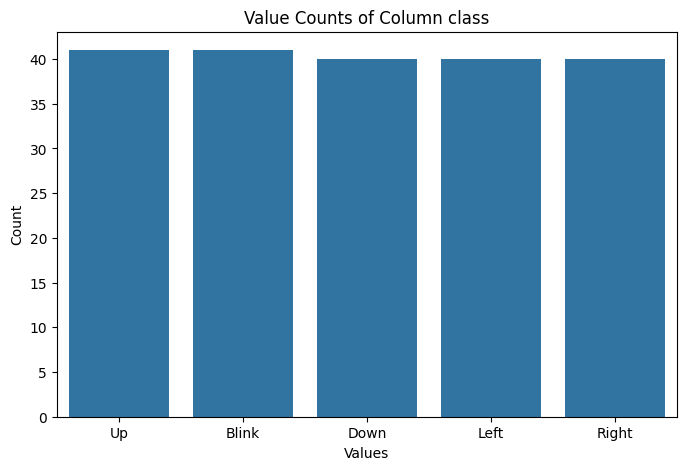

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Y = data["class"].astype(str)

plt.figure(figsize=(8, 5))
sns.countplot(x=Y, order=Y.value_counts().index)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Value Counts of Column class')
plt.show()


In [ ]:
data=concat_data
data

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
0,128,138,138,130,132,139,133,134,139,135,...,133.0,126.0,134.0,130.0,132.0,128.0,134.0,135.0,Blink,v
1,137,131,128,134,136,127,134,135,127,131,...,133.0,124.0,130.0,134.0,132.0,138.0,129.0,133.0,Blink,v
2,131,131,120,130,131,122,128,132,123,126,...,134.0,127.0,131.0,134.0,132.0,127.0,133.0,131.0,Blink,v
3,141,136,142,142,132,139,144,136,137,143,...,124.0,126.0,123.0,125.0,121.0,124.0,120.0,127.0,Blink,v
4,134,142,140,133,141,142,133,140,143,136,...,106.0,106.0,104.0,103.0,105.0,105.0,104.0,130.0,Blink,v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,129,135,138,133,131,139,133,131,137,136,...,136.0,130.0,137.0,139.0,129.0,134.0,135.0,152.0,Left,v
96,145,141,137,144,144,137,142,144,139,138,...,134.0,132.0,139.0,136.0,133.0,134.0,140.0,154.0,Left,v
97,130,132,124,133,134,127,130,133,131,128,...,154.0,163.0,180.0,184.0,189.0,196.0,197.0,132.0,Left,v
98,134,140,140,133,142,142,136,137,144,137,...,143.0,147.0,145.0,151.0,140.0,152.0,138.0,141.0,Left,v


In [ ]:
data.rename(columns={504: 'class'}, inplace=True)

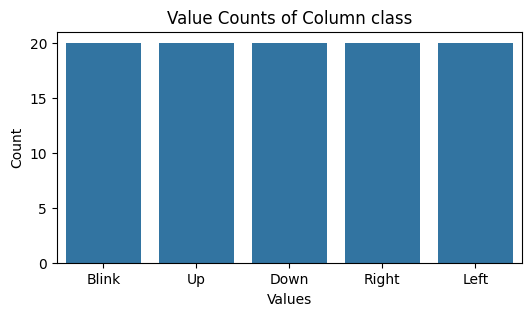

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Y = data["class"].astype(str)

plt.figure(figsize=(6, 3))
sns.countplot(x=Y, order=Y.value_counts().index)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Value Counts of Column class')
plt.show()


In [ ]:
# blink=0
# up=1
# down=2
# right=3
# left=4

In [ ]:
Y

0         Up
1         Up
3         Up
4      Blink
6         Up
       ...  
271     Left
272     Down
273    Blink
276     Left
277    Blink
Name: class, Length: 223, dtype: object

In [ ]:
Y=data["class"]
data = data.drop(columns = "class",axis = 1)

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
Y= label_encoder.fit_transform(Y)

Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
data.rename(columns={505: 'channel'}, inplace=True)
data = data.drop(columns ="channel",axis = 1)
X=data
X

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,503
0,128,138,138,130,132,139,133,134,139,135,...,125.0,130.0,133.0,126.0,134.0,130.0,132.0,128.0,134.0,135.0
1,137,131,128,134,136,127,134,135,127,131,...,132.0,128.0,133.0,124.0,130.0,134.0,132.0,138.0,129.0,133.0
2,131,131,120,130,131,122,128,132,123,126,...,130.0,137.0,134.0,127.0,131.0,134.0,132.0,127.0,133.0,131.0
3,141,136,142,142,132,139,144,136,137,143,...,125.0,120.0,124.0,126.0,123.0,125.0,121.0,124.0,120.0,127.0
4,134,142,140,133,141,142,133,140,143,136,...,119.0,109.0,106.0,106.0,104.0,103.0,105.0,105.0,104.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,129,135,138,133,131,139,133,131,137,136,...,129.0,131.0,136.0,130.0,137.0,139.0,129.0,134.0,135.0,152.0
96,145,141,137,144,144,137,142,144,139,138,...,140.0,134.0,134.0,132.0,139.0,136.0,133.0,134.0,140.0,154.0
97,130,132,124,133,134,127,130,133,131,128,...,153.0,157.0,154.0,163.0,180.0,184.0,189.0,196.0,197.0,132.0
98,134,140,140,133,142,142,136,137,144,137,...,144.0,150.0,143.0,147.0,145.0,151.0,140.0,152.0,138.0,141.0


In [ ]:
X.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       494, 495, 496, 497, 498, 499, 500, 501, 502, 503],
      dtype='object', length=504)

In [ ]:
X.dtypes

0      object
1      object
2      object
3      object
4      object
        ...  
499    object
500    object
501    object
502    object
503    object
Length: 504, dtype: object

In [ ]:
contains_h = (X == 'h').sum().sum()
contains_h

100

In [ ]:
contains_h = (X == 'Blink').sum().sum()
contains_h

20

In [ ]:
X[252]

0     h
1     h
2     h
3     h
4     h
     ..
95    h
96    h
97    h
98    h
99    h
Name: 252, Length: 100, dtype: object

In [ ]:
X[251]

0     Blink
1     Blink
2     Blink
3     Blink
4     Blink
      ...  
95     Left
96     Left
97     Left
98     Left
99     Left
Name: 251, Length: 100, dtype: object

In [ ]:
X.drop(columns = [251,252],inplace = True)

In [ ]:
X=X.astype(float)

In [ ]:
X.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
499    float64
500    float64
501    float64
502    float64
503    float64
Length: 502, dtype: object

Text(0, 0.5, 'Amp(V)')

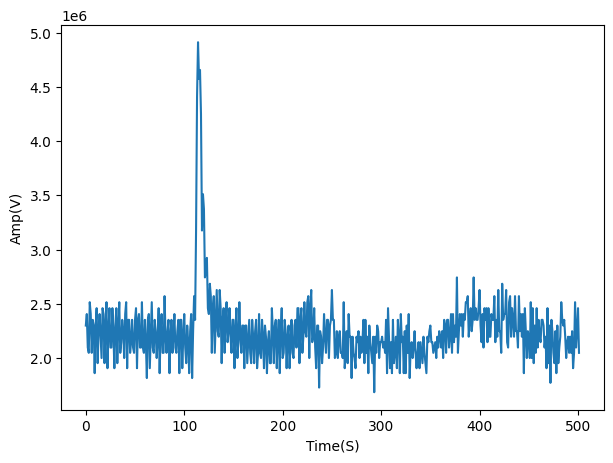

In [ ]:
# before pre process
plt.figure(figsize=(7,5))
plt.plot(np.arange(0,len(X.iloc[8])),X.iloc[8]**3)
plt.xlabel("Time(S)")
plt.ylabel("Amp(V)")

Text(0, 0.5, 'Amp(V)')

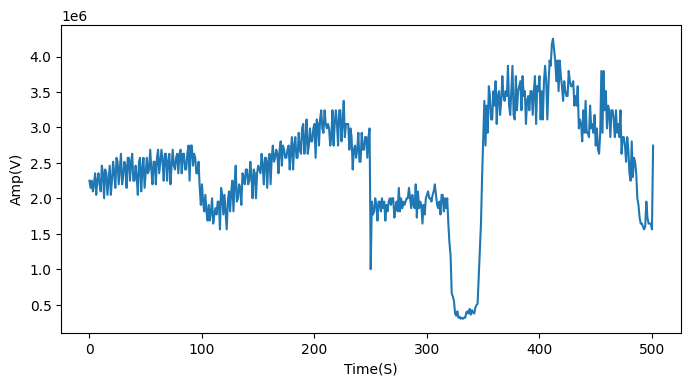

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(0,len(X.iloc[99])),X.iloc[99]**3) # left
plt.xlabel("Time(S)")
plt.ylabel("Amp(V)")

# signals pre preocess

In [ ]:
from scipy.signal import butter,filtfilt

def butter_bandpass_filter(Input_Signal,LOW_Cutoff,High_cuttOff,Sampling_Rate,order):
    nyq = 0.5 *Sampling_Rate
    low = LOW_Cutoff/ nyq
    high = High_cuttOff / nyq
    Numerator,denominator = butter(order,[low,high],btype = "band",output = "ba",analog = False,fs = None)
    filtered = filtfilt(Numerator,denominator,Input_Signal)
    return filtered

In [ ]:
filtered_Signal = butter_bandpass_filter(X,LOW_Cutoff=1.0,High_cuttOff=20.0,Sampling_Rate=176,order = 2)

In [ ]:
filtered_Signal=pd.DataFrame(filtered_Signal)
filtered_Signal

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,501
0,1.999357,4.936645,6.897975,7.745442,7.968205,7.951750,7.806673,7.578075,7.257461,6.857883,...,-2.080583,-2.990989,-3.465313,-3.622755,-3.600697,-3.480573,-3.180340,-2.470180,-1.235017,0.354068
1,-2.780993,-5.222206,-6.889672,-7.609711,-7.748463,-7.669980,-7.537514,-7.443128,-7.338282,-7.093815,...,-1.074658,-1.870830,-2.398686,-2.352437,-1.626080,-0.511537,0.466424,0.945755,0.936302,0.686762
2,-2.119926,-3.934492,-5.229174,-5.816907,-5.925291,-5.811193,-5.579437,-5.350655,-5.150003,-4.847588,...,2.056814,2.054595,1.548409,0.855603,0.323142,-0.018852,-0.299177,-0.491499,-0.517051,-0.427090
3,0.008314,-0.880769,-1.629176,-2.210301,-2.515989,-2.448989,-2.188156,-1.949930,-1.743773,-1.596039,...,-4.140276,-4.610223,-4.643601,-4.546940,-4.585299,-4.733390,-4.687276,-4.048714,-2.578598,-0.469470
4,-0.504029,1.522381,2.907424,3.577213,3.781138,3.694004,3.485703,3.295979,3.047363,2.653056,...,-13.044476,-17.747125,-22.237569,-25.879215,-28.260828,-28.894495,-27.029822,-21.793085,-12.805941,-1.162404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.355815,2.911317,4.677647,5.432380,5.482676,5.179861,4.735957,4.342311,4.068602,3.822714,...,-17.838074,-19.061187,-19.878618,-20.494341,-21.069486,-21.429825,-20.786935,-17.991152,-12.469963,-5.009755
96,-1.636473,-3.392237,-4.551341,-4.987521,-4.990884,-4.827106,-4.622990,-4.538385,-4.666070,-4.932429,...,-15.928441,-17.689357,-19.348236,-20.704196,-21.682243,-22.052798,-21.100498,-17.892700,-12.081431,-4.495711
97,-2.276119,-2.388171,-2.310736,-2.035710,-1.770275,-1.636432,-1.570664,-1.583957,-1.759513,-2.046968,...,20.925230,24.754743,31.433355,40.783161,51.095805,59.183828,61.110004,53.213317,34.053951,6.967791
98,0.369381,2.357340,3.864274,4.814194,5.329581,5.449847,5.281593,5.018307,4.676597,4.186019,...,0.656525,1.066166,1.507955,2.020610,2.509072,2.734434,2.497252,1.726989,0.506795,-0.939198


Text(0, 0.5, 'Amp(V)')

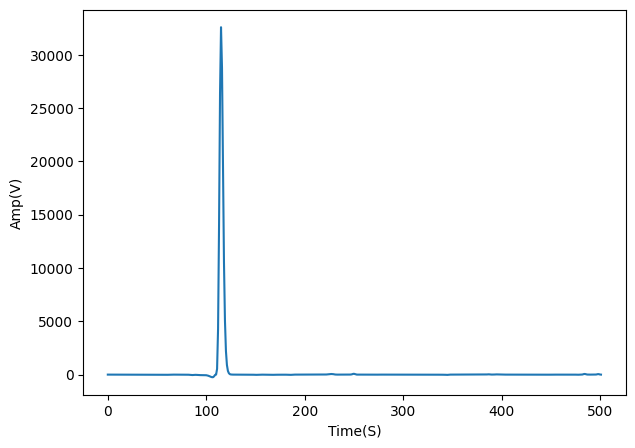

In [ ]:
#after pre precess
plt.figure(figsize=(7,5))
plt.plot(np.arange(0,len(filtered_Signal.iloc[8])),filtered_Signal.iloc[8]**3)
plt.xlabel("Time(S)")
plt.ylabel("Amp(V)")

Text(0, 0.5, 'Amp(V)')

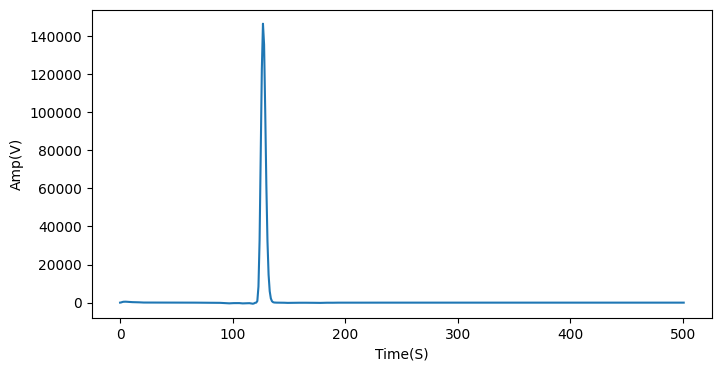

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(0,len(filtered_Signal.iloc[0])),filtered_Signal.iloc[0]**3)   #blink
plt.xlabel("Time(S)")
plt.ylabel("Amp(V)")

Text(0, 0.5, 'Amp(V)')

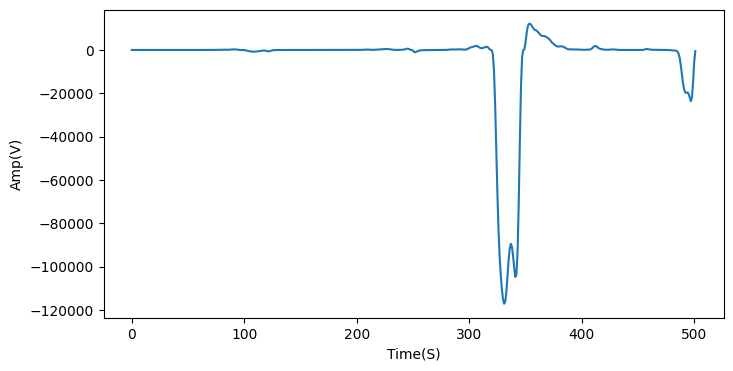

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(0,len(filtered_Signal.iloc[99])),filtered_Signal.iloc[99]**3) # left
plt.xlabel("Time(S)")
plt.ylabel("Amp(V)")

In [ ]:
data = np.array(filtered_Signal)
data = data.astype(float)
data_dct = data - np.mean(data)

In [ ]:
data_dct=pd.DataFrame(data_dct)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data_dct)

# data_normalized = pd.DataFrame(scaled_data, columns=filtered_Signal.columns)

# data_normalized


,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,501
0,-1.715150,-1.885776,-1.812919,-1.766999,-1.752637,-1.782271,-1.853662,-1.940077,-2.003129,-2.021908,...,-0.471302,-0.492660,-0.494833,-0.477220,-0.448411,-0.422388,-0.406860,-0.398951,-0.388555,-0.321039
1,-0.071337,0.646516,0.791640,0.839527,0.867040,0.881223,0.890638,0.895608,0.863506,0.779278,...,-0.057440,-0.052936,-0.044366,-0.025794,0.003247,0.033451,0.054917,0.063748,0.051629,-0.074561
2,0.191564,-0.610751,-0.774311,-0.816398,-0.811400,-0.773070,-0.736702,-0.716402,-0.681890,-0.630766,...,-0.249500,-0.262842,-0.286964,-0.316540,-0.349186,-0.384204,-0.416938,-0.435879,-0.415876,-0.172786
3,1.041707,1.257009,1.265620,1.287250,1.331076,1.395526,1.445161,1.449767,1.420230,1.360374,...,-0.408045,-0.450547,-0.440439,-0.403588,-0.361359,-0.325409,-0.296288,-0.263222,-0.190381,0.226268
4,-0.583682,-0.910321,-0.896237,-0.827859,-0.745479,-0.664796,-0.618670,-0.663667,-0.808075,-1.000365,...,-0.157135,-0.172411,-0.200376,-0.231319,-0.258303,-0.276046,-0.282848,-0.282275,-0.281220,-0.289914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.368620,-0.811769,-0.889122,-0.939164,-0.981699,-0.981093,-0.922292,-0.812705,-0.669373,-0.533569,...,0.380000,0.405220,0.401237,0.378660,0.353919,0.337265,0.328342,0.318036,0.283835,0.055622
96,0.159840,0.478459,0.521754,0.511601,0.476826,0.421863,0.360092,0.315498,0.286553,0.257183,...,-1.020050,-1.030198,-1.020870,-0.993896,-0.959001,-0.928028,-0.907491,-0.897014,-0.894775,-0.893824
97,0.548718,1.168118,1.262375,1.271895,1.253788,1.229639,1.202091,1.172124,1.145605,1.115568,...,-0.334309,-0.327299,-0.346234,-0.376276,-0.404235,-0.424785,-0.437858,-0.449313,-0.474568,-0.610392
98,-1.128874,-1.068299,-0.985890,-0.928582,-0.864341,-0.785634,-0.684015,-0.568878,-0.474488,-0.405506,...,-0.814362,-0.838674,-0.846611,-0.835819,-0.816941,-0.801508,-0.792365,-0.789246,-0.801220,-0.897004


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data_dct)
data_normalized = pd.DataFrame(scaled_data, columns=filtered_Signal.columns)
data_normalized

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,501
0,0.921797,1.000000,0.992035,0.965847,0.958749,0.966678,0.980957,0.986307,0.975760,0.960498,...,0.241779,0.231351,0.225675,0.224707,0.226107,0.227625,0.228880,0.231086,0.236948,0.268186
1,0.333930,0.000000,0.000000,0.000963,0.010718,0.004070,0.000000,0.000000,0.000000,0.000000,...,0.249504,0.239453,0.232869,0.232635,0.237583,0.244206,0.249836,0.254012,0.258635,0.277951
2,0.415225,0.126758,0.119475,0.113619,0.120692,0.118608,0.125180,0.137394,0.146292,0.154640,...,0.273552,0.267844,0.259491,0.252657,0.248911,0.246957,0.245436,0.244366,0.244119,0.245259
3,0.676947,0.427355,0.378498,0.340250,0.326341,0.325786,0.341985,0.360689,0.374006,0.378492,...,0.225962,0.219639,0.217728,0.218939,0.220385,0.220628,0.220220,0.220492,0.223529,0.244015
4,0.613941,0.663912,0.704911,0.703925,0.706185,0.704316,0.704716,0.705140,0.694305,0.671018,...,0.157583,0.124623,0.099065,0.085803,0.082793,0.085698,0.091829,0.101403,0.121379,0.223677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.719682,0.800634,0.832280,0.820499,0.808822,0.795874,0.784645,0.773843,0.762577,0.751543,...,0.120771,0.115119,0.114975,0.119410,0.124586,0.127385,0.127704,0.126919,0.124735,0.110753
96,0.474678,0.180135,0.168245,0.165736,0.177055,0.179247,0.186326,0.190728,0.178644,0.148799,...,0.135436,0.125041,0.118552,0.118101,0.121025,0.123906,0.125902,0.127580,0.128615,0.125841
97,0.396017,0.278972,0.329459,0.351221,0.371323,0.375856,0.381462,0.384719,0.372954,0.347448,...,0.418451,0.432029,0.461051,0.501848,0.543980,0.577581,0.598323,0.604799,0.589411,0.462305
98,0.721350,0.746103,0.773757,0.781654,0.799587,0.812511,0.819528,0.818230,0.803223,0.776554,...,0.262799,0.260695,0.259218,0.259928,0.261614,0.262333,0.261506,0.259255,0.254345,0.230228


In [ ]:
# Apply PSD
from scipy import signal
f, Pxx_den = signal.welch(data_dct, fs=176,nperseg =251)
X_psd =np.log10(Pxx_den)

# classifiers & feature extraction (PSD & WAVELET)

In [ ]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],}
# # Perform grid search with cross-validation
# rf_classifier = RandomForestClassifier()
# grid_search = GridSearchCV(rf_classifier, param_grid, cv=10)

# # Fit the grid search to the data
# grid_search.fit(X_train_psd,  Y)

# # Print the best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_psd, X_test_psd, Y_train, Y_test = train_test_split(X_psd, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


rf_classifier = RandomForestClassifier(max_depth= None,
                                       min_samples_leaf= 2,
                                       min_samples_split= 5,
                                       n_estimators= 300)

cross_val_scores = cross_val_score(rf_classifier, X_train_psd, Y_train, cv=10)

rf_classifier.fit(X_train_psd, Y_train)

Y_pred = rf_classifier.predict(X_test_psd)
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy * 100)

import joblib
joblib.dump(rf_classifier, 'rf_classifier_PSD.joblib')

Accuracy: 85.0


['rf_classifier_PSD.joblib']

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC(kernel='linear', C=1)

svm_classifier.fit(X_train_psd, Y_train)
Y_pred = svm_classifier.predict(X_test_psd)
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy * 100)

Accuracy: 85.0


In [ ]:
# import pandas as pd

# newData = pd.DataFrame(X_test_psd)
# newData.to_csv('/kaggle/working/newData.csv', index=False)

In [ ]:
# from flask import Flask, send_file

# app = Flask(__name__)

# @app.route('/download_newData')
# def download_test_data():
#     return send_file('newData.csv', as_attachment=True)

# if __name__ == '__main__':
#     app.run(debug=True)


In [ ]:
#wavelet   2

import pywt
wavelet = 'db4'
level = 3
def apply_wavelet(row):
    coeffs = pywt.wavedec(row, wavelet, level=level)
    features = []
    for coeff in coeffs:
        features += coeff.tolist()
    return pd.Series(features)

xx = data_normalized.apply(apply_wavelet, axis=1)

In [ ]:
X_train_W, X_test_W, y_train_W, y_test_W = train_test_split(xx,Y, test_size=0.25)

In [ ]:
rf_model_2 = RandomForestClassifier(max_depth= None,
                                    min_samples_leaf= 2,
                                    min_samples_split= 5,
                                    n_estimators= 300)

rf_model_2.fit(X_train_W, y_train_W)

Y_pred = rf_model_2.predict(X_test_W)
accuracy = accuracy_score(y_test_W, Y_pred)

print("Accuracy:", accuracy * 100)

Accuracy: 84.0


In [ ]:
import pickle
with open('rf_classifier_wavelet2.pkl', 'wb') as file:
    pickle.dump(rf_model_2, file)

In [ ]:
joblib.dump(rf_model_2, 'rf_classifier_wavelet2.joblib')
# files.download('rf_classifier_wavelet2.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC(kernel='linear', C=1)

svm_classifier.fit(X_train_W, y_train_W)
Y_pred = svm_classifier.predict(X_test_W)
accuracy = accuracy_score(y_test_W, Y_pred)

print("Accuracy:", accuracy * 100)


Accuracy: 64.0


# raw data

In [ ]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X,Y, test_size=0.25)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC(kernel='linear', C=1)

svm_classifier.fit(X_train_raw, y_train_raw)
Y_pred = svm_classifier.predict(X_test_raw)
accuracy = accuracy_score(y_test_raw, Y_pred)

print("Accuracy:", accuracy * 100)

Accuracy: 88.0


In [ ]:
rf_model_3 = RandomForestClassifier(max_depth= None,
                                    min_samples_leaf= 2,
                                    min_samples_split= 5,
                                    n_estimators= 300)

rf_model_3.fit(X_train_raw, y_train_raw)

Y_pred = rf_model_3.predict(X_test_raw)
accuracy = accuracy_score(y_test_raw, Y_pred)

print("Accuracy:", accuracy * 100)

Accuracy: 92.0


In [ ]:
joblib.dump(rf_model_3, 'rf_classifier_raw.joblib')
# files.download('rf_classifier_raw.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# test

In [ ]:
loaded_rf_classifier = joblib.load('/content/rf_classifier_wavelet2.pkl')
data_path=pd.read_csv('/content/X_test_W_5_rows.csv')
Y_pred = loaded_rf_classifier.predict(data_path)
Y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1, 2, 1, 1, 4, 1])

# not used

In [ ]:
clf = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 300)
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

Accuracy: 84.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(filtered_Signal,Y, test_size=0.25)


In [ ]:
clf = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 300)
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

Accuracy: 80.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_normalized,Y, test_size=0.25)


In [ ]:
clf = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 300)
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

Accuracy: 96.0


In [ ]:
f, Pxx_den = signal.welch(X_train, fs=176,nperseg =251)
X_train_psd =np.log10(Pxx_den)

# Apply PSD feature extraction on the testing set
f, Pxx_den = signal.welch(X_test, fs=176, nperseg=251)
X_test_psd = np.log10(Pxx_den)

In [ ]:
clf = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 300)
clf.fit(X_train_psd, y_train)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_psd)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

Accuracy: 92.0


In [ ]:
# #fft
# T = 1/176
# signal = np.array(filtered_Signal.iloc[0])

# fft_result = np.fft.fft(signal)

# sampling_rate = 176
# n = np.arange(0,len(signal))
# freq = n/T

# frequency_axis = np.fft.fftfreq(len(signal), 1 / sampling_rate)

# plt.plot(frequency_axis, np.abs(fft_result))
# plt.xlabel('Frequency')
# plt.ylabel('Magnitude')
# plt.title('FFT of the Signal')
# plt.show()

# test data

In [ ]:
X_test_W

,0,1,2,3,4,5,6,7,8,9,...,510,511,512,513,514,515,516,517,518,519
40,3.443292,3.471806,3.543374,3.496334,3.586461,2.983266,1.978493,2.106170,1.907535,-0.279611,...,0.000139,0.002140,-0.000168,-0.004315,0.003376,0.002009,-0.021808,0.006259,0.012276,0.000943
84,-3.210520,-3.209581,-3.214308,-3.256812,-3.123430,-3.490156,-4.304711,-1.532077,-0.505203,-0.482141,...,0.006294,-0.002405,-0.006019,0.002862,0.003810,-0.002308,0.015303,-0.005339,-0.009177,-0.002303
15,1.278088,1.308146,1.376154,1.331114,1.336080,1.239367,-1.038295,-0.274621,0.074618,0.082782,...,0.007206,-0.005233,-0.010873,0.003159,0.009179,-0.002588,-0.092314,0.030901,0.055070,0.011127
21,-2.443480,-2.055500,-1.994111,-1.573361,-2.964567,-0.401479,-1.667673,-3.454565,-5.653646,-2.521513,...,0.000577,0.004615,0.000312,-0.003523,-0.001906,0.004259,-0.000455,-0.000430,-0.000152,-0.002342
39,-1.921713,-1.980974,-2.005810,-2.046970,-1.885882,-2.036260,-2.850907,-4.603084,-6.662065,-4.223942,...,0.002280,0.003879,0.003825,0.000170,-0.007774,0.002229,0.025730,-0.008514,-0.015078,-0.001843
82,-2.979228,-3.002673,-3.056767,-3.051083,-2.888258,-3.375246,-4.382271,-4.139400,-2.313006,-0.771593,...,-0.000028,-0.002460,-0.000213,0.003658,-0.001683,-0.000582,0.013356,-0.004063,-0.007524,-0.002241
93,0.774560,0.766778,0.765878,0.769660,0.770830,0.768163,0.938361,0.623328,1.091407,0.018737,...,-0.002385,0.001352,-0.004181,0.001417,0.004617,-0.001230,0.024985,-0.008788,-0.015623,-0.005175
80,3.903909,4.016903,4.078338,4.205157,3.612083,5.046087,3.859436,5.148065,2.334557,0.905454,...,0.001208,-0.005678,0.001997,0.002300,-0.001116,0.000034,0.001973,0.000006,-0.000477,-0.002281
83,-2.653105,-2.632631,-2.666888,-2.572466,-2.888014,-1.864229,-1.015740,0.294988,0.673532,0.544627,...,-0.001427,-0.007763,-0.005617,0.008197,0.003139,-0.003756,-0.006471,0.002835,0.004410,0.000137
30,-6.987086,-6.766628,-6.714797,-6.589974,-7.046320,-6.565932,-5.933402,-9.764307,-2.666894,13.237597,...,-0.002378,0.003484,0.001594,-0.004531,-0.002375,0.002736,0.039025,-0.013897,-0.024026,-0.003948


In [ ]:
import pandas as pd

X_test_W_5_rows = X_test_W.head(6)

X_test_W_5_rows.to_csv('/content/X_test_W_5_rows.csv', index=False)


In [ ]:
X_test_W_data = pd.read_csv('/content/X_test_W_5_rows.csv')
X_test_W_data

,0,1,2,3,4,5,6,7,8,9,...,510,511,512,513,514,515,516,517,518,519
0,3.443292,3.471806,3.543374,3.496334,3.586461,2.983266,1.978493,2.106170,1.907535,-0.279611,...,0.000139,0.002140,-0.000168,-0.004315,0.003376,0.002009,-0.021808,0.006259,0.012276,0.000943
1,-3.210520,-3.209581,-3.214308,-3.256812,-3.123430,-3.490156,-4.304711,-1.532077,-0.505203,-0.482141,...,0.006294,-0.002405,-0.006019,0.002862,0.003810,-0.002308,0.015303,-0.005339,-0.009177,-0.002303
2,1.278088,1.308146,1.376154,1.331114,1.336080,1.239367,-1.038295,-0.274621,0.074618,0.082782,...,0.007206,-0.005233,-0.010873,0.003159,0.009179,-0.002588,-0.092314,0.030901,0.055070,0.011127
3,-2.443480,-2.055500,-1.994111,-1.573361,-2.964567,-0.401479,-1.667673,-3.454565,-5.653646,-2.521513,...,0.000577,0.004615,0.000312,-0.003523,-0.001906,0.004259,-0.000455,-0.000430,-0.000152,-0.002342
4,-1.921713,-1.980974,-2.005810,-2.046970,-1.885882,-2.036260,-2.850907,-4.603084,-6.662065,-4.223942,...,0.002280,0.003879,0.003825,0.000170,-0.007774,0.002229,0.025730,-0.008514,-0.015078,-0.001843
5,-2.979228,-3.002673,-3.056767,-3.051083,-2.888258,-3.375246,-4.382271,-4.139400,-2.313006,-0.771593,...,-0.000028,-0.002460,-0.000213,0.003658,-0.001683,-0.000582,0.013356,-0.004063,-0.007524,-0.002241


In [ ]:
loaded_rf_classifier = joblib.load('/content/rf_classifier_wavelet2.joblib')

Y_pred = loaded_rf_classifier.predict(X_test_W_data)
Y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1, 2, 1, 1, 3, 2])

In [ ]:
with open('/content/rf_classifier_wavelet2.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
Y_pred = loaded_model.predict(X_test_W_data)
Y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1, 2, 1, 1, 1, 2])